In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import seaborn as sns
from scipy import stats

In [3]:

def remove_tags(sequence):
    colors = ["red", "green"]
    sequence = sequence.replace("</font>", "")
    for color in colors:
        sequence = sequence.replace(f"<font color = {color}>", "")
    return sequence


In [4]:

## result files
files = os.listdir("adv_results/")
datasets = {}
for file in files:
    if file != '.DS_Store':
        df = pd.read_csv(f"adv_results/{file}")
        file = file.replace(".csv","")
        datasets[file] = {
           'original_text': [remove_tags(text) for text in df['original_text'].values.tolist()], 
           'perturbed_text': [remove_tags(text) for text in df['perturbed_text'].values.tolist()],
            'num_queries': df['num_queries'].values.tolist(),
            'original_text_len': [len(remove_tags(text)) for text in df['original_text'].values.tolist()], 
        }

In [ ]:
datasets.keys()

In [ ]:
datasets_fuzzy_char = ['germeval_baseline_whitebox_wordlevel', 'germeval_whitebox_charlevel', 'germeval_whitebox_wordlevel', 'hasoc_baseline_whitebox_wordlevel', 'hasoc_whitebox_wordlevel', 'hasoc_whitebox_charlevel']
fuzzy_results = []
for dataset in datasets_fuzzy_char:
    #fuzzy_results[dataset] = 
    for idx, _ in enumerate(datasets[dataset]['original_text']):
        score = fuzz.ratio(datasets[dataset]['original_text'][idx], datasets[dataset]['perturbed_text'][idx])/100
        fuzzy_results.append({
            'score':score,
            'dataset': dataset.split('_')[0],
            'attack': " ".join(dataset.split('_')[1:]).replace(" whitebox ", " ")
        })

In [ ]:
fuzzy_df = pd.DataFrame(fuzzy_results)
a4_dims = (10, 8)
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(ax=ax, x="attack", y="score", hue="dataset",
                 data=fuzzy_df, )

In [55]:
datasets_corr = ['germeval_baseline_whitebox_wordlevel', 'germeval_whitebox_charlevel', 'germeval_whitebox_wordlevel', 'hasoc_baseline_whitebox_wordlevel', 'hasoc_whitebox_wordlevel', 'hasoc_whitebox_charlevel']
corr_results = []
for dataset in datasets_corr:
    points_a, points_b = [], []
    for idx, _ in enumerate(datasets[dataset]['original_text']):
        points_a.append(datasets[dataset]["num_queries"][idx])
        points_b.append(datasets[dataset]["original_text_len"][idx])
        
    
    corr_results.append({
        'pearson r':stats.pearsonr(points_a, points_b)[0],
        'dataset': dataset.split('_')[0],
        'attack': " ".join(dataset.split('_')[1:]).replace(" whitebox ", " ")
    })

In [56]:
corr_df = pd.DataFrame(corr_results)

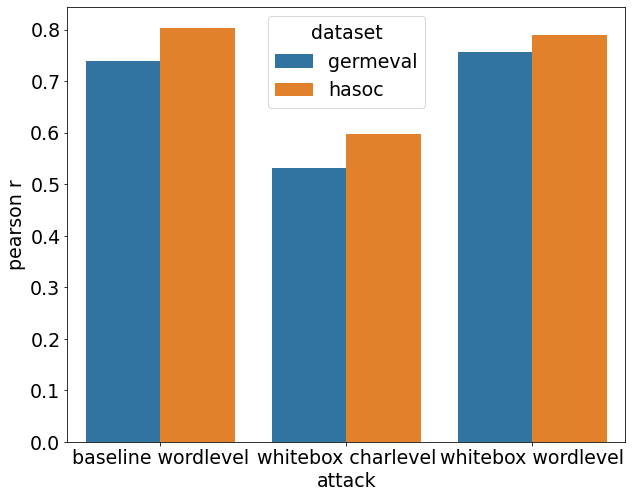

In [58]:
a4_dims = (10, 8)
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, x="attack", y="pearson r", hue="dataset",
                 data=corr_df  )
#g = sns.factorplot(x="X_Axis", y="vals", hue='cols', data=dfm)

In [28]:
corr_df.sort_values(by=['original_text_len'], inplace=True)
corr_df.head()


,num_queries,original_text_len,dataset,full,attack
1294,1.0,1,germeval,germeval_whitebox_charlevel,whitebox charlevel
1942,1.0,1,germeval,germeval_whitebox_wordlevel,whitebox wordlevel
646,1.0,1,germeval,germeval_baseline_whitebox_wordlevel,baseline wordlevel
747,18.0,6,germeval,germeval_whitebox_charlevel,whitebox charlevel
99,1.0,6,germeval,germeval_baseline_whitebox_wordlevel,baseline wordlevel


In [41]:
corr_df[corr_df['full']=='germeval_whitebox_charlevel']

,num_queries,original_text_len,dataset,full,attack
1294,1.0,1,germeval,germeval_whitebox_charlevel,whitebox charlevel
747,18.0,6,germeval,germeval_whitebox_charlevel,whitebox charlevel
1268,18.0,7,germeval,germeval_whitebox_charlevel,whitebox charlevel
731,41.0,7,germeval,germeval_whitebox_charlevel,whitebox charlevel
909,18.0,7,germeval,germeval_whitebox_charlevel,whitebox charlevel
...,...,...,...,...,...
863,1338.0,1427,germeval,germeval_whitebox_charlevel,whitebox charlevel
900,170.0,1449,germeval,germeval_whitebox_charlevel,whitebox charlevel
691,366.0,1457,germeval,germeval_whitebox_charlevel,whitebox charlevel
991,2440.0,1596,germeval,germeval_whitebox_charlevel,whitebox charlevel


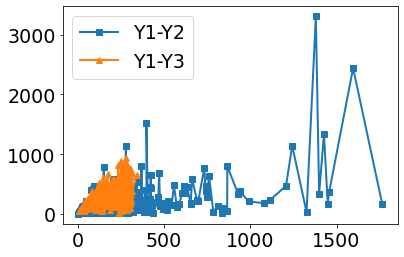

In [46]:


y1 = corr_df[corr_df['full']=='germeval_whitebox_charlevel'].original_text_len.values.tolist()
y2 = corr_df[corr_df['full']=='germeval_whitebox_charlevel'].num_queries.values.tolist()

y3 = corr_df[corr_df['full']=='hasoc_whitebox_charlevel'].original_text_len.values.tolist()
y4 = corr_df[corr_df['full']=='hasoc_whitebox_charlevel'].num_queries.values.tolist()
"""
y3 = [32, 34, 35, 38, 39, 33, 35, 36]
y4 = [42, 44, 45, 48, 49, 43, 45, 46]
y5 = [52, 54, 55, 58, 59, 53, 55, 56]"""
 
 
# Plot lines with different marker sizes
plt.plot(y1, y2, label = 'Y1-Y2', lw=2, marker='s') # square
plt.plot(y3, y4, label = 'Y1-Y3', lw=2, marker='^') # triangle
"""
plt.plot(y1, y4, label = 'Y1-Y4', lw=2, marker='o', ms=10) # circle
plt.plot(y1, y5, label = 'Y1-Y5', lw=2, marker='D', ms=10) # diamond
plt.plot(y2, y5, label = 'Y2-Y5', lw=2, marker='P', ms=10) # filled plus sign"""
 
plt.legend()
plt.show()